In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_excel("Data_Train.xlsx")

df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [74]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [75]:
#Eliminar los valores nulos y remplazarlos por 0
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


array([[<Axes: title={'center': 'Price'}>]], dtype=object)

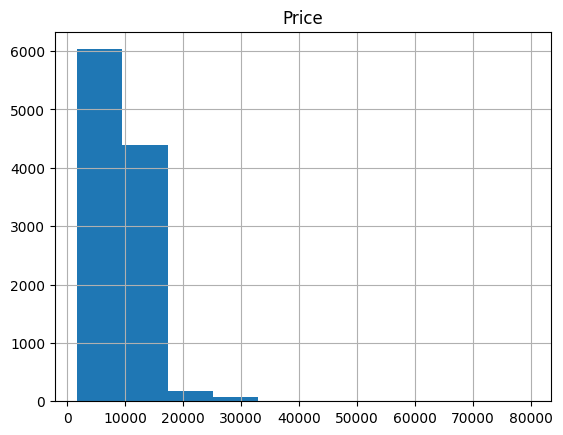

In [76]:
df.hist()

In [77]:
#funciones ayuda normalizacion datos
import re

def convertir_a_horas(valor): 
    
    h = re.search(r"(\d+)\s*h", valor)
    m = re.search(r"(\d+)\s*m", valor)
    
    horas = int(h.group(1)) if h else 0
    minutos = int(m.group(1)) if m else 0
    
    return horas + minutos/60

In [78]:
#Normalizacion datos
df["Total_Stops_INT"] = df["Total_Stops"].map({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})
df['Additional_Info_INT'] = df['Additional_Info'].map({"No info": 0, "In-flight meal not included": 1, "Red-eye flights":2, "No check-in baggage included": 3, "Change Airpots": 4, "Buisness class": 5, "1 long layover": 6})
df["Duration_INT"] = df["Duration"].apply(convertir_a_horas)
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              10683 non-null  object 
 1   Date_of_Journey      10683 non-null  object 
 2   Source               10683 non-null  object 
 3   Destination          10683 non-null  object 
 4   Route                10683 non-null  object 
 5   Dep_Time             10683 non-null  object 
 6   Arrival_Time         10683 non-null  object 
 7   Duration             10683 non-null  object 
 8   Total_Stops          10683 non-null  object 
 9   Additional_Info      10683 non-null  object 
 10  Price                10683 non-null  int64  
 11  Total_Stops_INT      10683 non-null  float64
 12  Additional_Info_INT  10683 non-null  float64
 13  Duration_INT         10683 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 1.1+ MB


In [79]:
# df = df.drop(["Duration", "Total_Stops"], axis=1)